### Imports
Event accumulator to fetch data from a saved checkpoint file

In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
event_file = '../train/log0'
eacc = EventAccumulator(event_file)
eacc.Reload()
eacc.Tags()

INFO:tensorflow:No path found after ../train/log0/events.out.tfevents.1506466267.Alexs-MacBook-Pro.local


{'audio': [],
 'distributions': [],
 'graph': True,
 'histograms': [],
 'images': [],
 'meta_graph': True,
 'run_metadata': [],
 'scalars': ['Input_pipeline/input_producer/fraction_of_32_full',
  'train/error_summary'],
 'tensors': ['XOR_model/hidden_layer/weights/tensor_summary',
  'XOR_model/hidden_layer/biases/tensor_summary',
  'XOR_model/hidden_layer/net_input/tensor_summary',
  'XOR_model/hidden_layer/activations/tensor_summary',
  'XOR_model/output_layer/weights/tensor_summary',
  'XOR_model/output_layer/biases/tensor_summary',
  'XOR_model/output_layer/net_input/tensor_summary',
  'XOR_model/output_layer/activations/tensor_summary']}

<IPython.core.display.Javascript object>


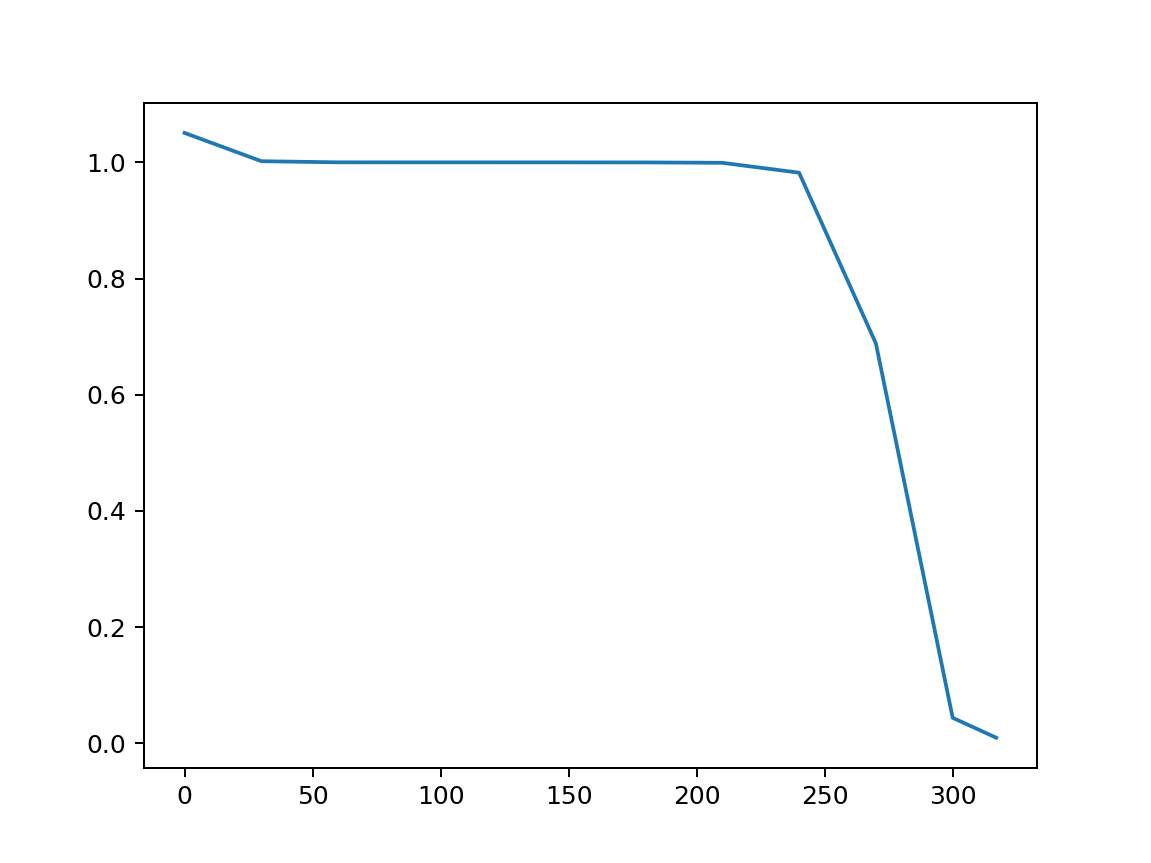

0
30
60
90
120
150
180
210
240
270
300
317


In [3]:
lc = np.stack(
  [np.asarray([scalar.step, scalar.value]) for scalar in eacc.Scalars('train/error_summary')])
plt.plot(lc[:,0],lc[:,1])
for scalar in eacc.Scalars('train/error_summary'):
    print(scalar.step)

In [4]:
np.set_printoptions(precision=3)

model_name = 'XOR_model'
layer_name = 'output_layer'
data_type = np.float32
for tt in eacc.Tags()['tensors']:
    fetch = '/'.join([model_name, layer_name])
    if fetch in tt:
        print(tt)
        for te in eacc.Tensors(tt):
            shape = [i.size for i in te.tensor_proto.tensor_shape.dim]
            binary_tensor = te.tensor_proto.tensor_content
            deci_tensor  = np.fromstring(binary_tensor, dtype=np.float32).reshape(shape)
            print('training step: {}\n tensor shape: {}\n{}\n'.format(te.step, shape, deci_tensor))

XOR_model/output_layer/weights/tensor_summary
training step: 0
 tensor shape: [2, 1]
[[ 0.272]
 [ 0.082]]

training step: 30
 tensor shape: [2, 1]
[[ 0.128]
 [-0.017]]

training step: 60
 tensor shape: [2, 1]
[[ 0.051]
 [-0.035]]

training step: 90
 tensor shape: [2, 1]
[[ 0.018]
 [-0.049]]

training step: 120
 tensor shape: [2, 1]
[[ 0.009]
 [-0.072]]

training step: 150
 tensor shape: [2, 1]
[[ 0.009]
 [-0.107]]

training step: 240
 tensor shape: [2, 1]
[[-0.041]
 [-0.922]]

training step: 270
 tensor shape: [2, 1]
[[-0.776]
 [-4.258]]

training step: 300
 tensor shape: [2, 1]
[[-6.554]
 [-6.54 ]]

training step: 317
 tensor shape: [2, 1]
[[-8.197]
 [-7.403]]

XOR_model/output_layer/biases/tensor_summary
training step: 0
 tensor shape: [1]
[ 0.279]

training step: 30
 tensor shape: [1]
[ 0.031]

training step: 60
 tensor shape: [1]
[-0.004]

training step: 90
 tensor shape: [1]
[ 0.007]

training step: 120
 tensor shape: [1]
[ 0.019]

training step: 150
 tensor shape: [1]
[ 0.03]

tr

In [5]:
def get_event_accumulator(path_to_event_file):
    event_file = path_to_event_file
    eacc = EventAccumulator(event_file)
    eacc.Reload()
    return eacc

def retrieve_array(path_to_event_file, layer_name, tensor_name, data_type=np.float32):
    eacc = get_event_accumulator(path_to_event_file)
    ln = layer_name
    dt = data_type
    for tt in eacc.Tags()['tensors']:
        fetch = '/'.join([layer_name, tensor_name])
        if fetch in tt:
            ra = []
            rs = []
            for te in eacc.Tensors(tt):
                shape = [i.size for i in te.tensor_proto.tensor_shape.dim]
                binary_tensor = te.tensor_proto.tensor_content
                deci_tensor  = np.fromstring(binary_tensor, dtype=dt).reshape(shape)
                ra.append(deci_tensor)
                rs.append(te.step)
    return ra, rs

In [6]:
retrieve_array(event_file, 'hidden_layer', 'biases')

INFO:tensorflow:No path found after ../train/log0/events.out.tfevents.1506466267.Alexs-MacBook-Pro.local


([array([-0.277, -0.403], dtype=float32),
  array([-0.427, -0.545], dtype=float32),
  array([-0.411, -0.571], dtype=float32),
  array([-0.387, -0.574], dtype=float32),
  array([-0.376, -0.576], dtype=float32),
  array([-0.37 , -0.579], dtype=float32),
  array([-0.354, -0.697], dtype=float32),
  array([-0.486,  0.537], dtype=float32),
  array([-4.799,  1.68 ], dtype=float32),
  array([-6.193,  2.359], dtype=float32)],
 [0, 30, 60, 90, 120, 150, 240, 270, 300, 317])

In [7]:
retrieve_array(event_file, 'hidden_layer', 'net_input')

INFO:tensorflow:No path found after ../train/log0/events.out.tfevents.1506466267.Alexs-MacBook-Pro.local


([array([[-0.277, -0.403],
         [ 0.172, -0.366],
         [ 0.156, -0.441],
         [ 0.604, -0.404]], dtype=float32), array([[-0.427, -0.545],
         [-0.048, -0.584],
         [-0.064, -0.654],
         [ 0.314, -0.693]], dtype=float32), array([[-0.411, -0.571],
         [-0.034, -0.632],
         [-0.051, -0.695],
         [ 0.326, -0.756]], dtype=float32), array([[-0.387, -0.574],
         [-0.002, -0.649],
         [-0.019, -0.705],
         [ 0.367, -0.781]], dtype=float32), array([[-0.376, -0.576],
         [ 0.014, -0.671],
         [-0.002, -0.719],
         [ 0.388, -0.815]], dtype=float32), array([[-0.37 , -0.579],
         [ 0.024, -0.709],
         [ 0.008, -0.746],
         [ 0.401, -0.876]], dtype=float32), array([[-0.354, -0.697],
         [ 0.049, -1.695],
         [ 0.032, -1.695],
         [ 0.435, -2.693]], dtype=float32), array([[-0.486,  0.537],
         [ 0.15 , -3.52 ],
         [ 0.134, -3.519],
         [ 0.771, -7.576]], dtype=float32), array([[ -4.79